In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

6.014512333696956 -11.717265505152938
45.022634868337235 26.5182249892581
-54.9132909336299 -31.896185784877275
51.155209762168084 107.00265757282097
10.098226080411877 -148.53171571420066
18.107312142410294 132.99101577419788
-80.71159948874295 -96.89401262453377
36.38038217229604 29.05279168977421
-52.241063021684106 29.549787504709514
-60.140165359204055 83.15262648037469
-29.346889432977555 -93.58379327979603
0.36661670818644154 30.849122277678248
85.57503648811766 159.73821189564467
65.93345010220372 48.32137056744949
78.61580494228039 155.32313519783133
-19.859998412808693 52.6321820986783
-27.38110262123937 -146.32179152069713
-44.13604319927258 -146.66006786802157
43.339398861065916 -160.05409246147659
30.419923575465333 -121.15795746726079
-67.94808325035302 76.83063155417375
-11.655908704610937 -21.209022661774384
20.320021596740688 91.78752559427045
-82.26974067299211 -173.48584366952176
-49.015973405079784 174.92922705977787
57.72089551105407 -159.36706319052473
75.19920902

58.555438758257026 -92.28054657354261
27.96203459404863 131.20828321055996
-53.97693010359683 -17.69774822115997
57.012988073347685 -24.66014927739073
-65.06976411460855 -83.23950208408934
-65.95959302170203 -110.39244657542778
-21.369455604155007 -3.9331668545952994
23.396599850004705 58.455811189926976
-4.780301992404048 91.19937401861097
-8.403265244876081 -76.14266249579309
-75.97744148199922 -153.7930498283977
75.42486359646378 -170.97025594313388
-23.242802580797502 87.13343367048515
-19.437755499241348 -27.983033984744964
-33.43920020980474 130.1800770057577
45.52372469409991 -54.63652097483681
3.5366748656327474 159.39918133635052
-65.00655328906431 -35.34147356353691
-38.403985853358435 -149.4318986299119
45.99167755227941 0.8578433195119999
-50.08219430874375 144.9220411830438
-37.600028741580296 119.73180387036865
51.595268179593916 -175.4017914819989
-26.512430445170793 -12.50036506525717
5.65442732943832 -139.7493798205427
47.881064659287546 -170.68990934125264
47.03170551

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
#Import requests and weather_api_key
import requests
from config import weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [7]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes. 
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the dat to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# #Loop through all the cities in our list:
# for i in range(len(cities)):
#     #Group cities in sets of 50 for logging purposes.
#     if(i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)
        
#     #create endpoint url with each city
#     city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | robertsport
Processing Record 2 of Set 1 | sahateni
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | tarbagatay
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | alugan
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | fethiye
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | kyenjojo
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | koslan
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | le port
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | isla vista
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | teknaf
Processing Record 23 of Set 1 | vaini
Proc

Processing Record 39 of Set 4 | luanda
Processing Record 40 of Set 4 | lata
Processing Record 41 of Set 4 | mizpe ramon
City not found. Skipping...
Processing Record 42 of Set 4 | yizheng
Processing Record 43 of Set 4 | irtyshskiy
Processing Record 44 of Set 4 | pekan
Processing Record 45 of Set 4 | solsvik
City not found. Skipping...
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | goksun
Processing Record 49 of Set 4 | hovd
Processing Record 50 of Set 4 | aksu
Processing Record 1 of Set 5 | nouadhibou
Processing Record 2 of Set 5 | richards bay
Processing Record 3 of Set 5 | lewistown
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | pemangkat
Processing Record 7 of Set 5 | sistranda
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | kerchevskiy
Processing Record 10 of Set 5 | leshukonskoye
Processing Record 11 of Set 5 | gamba
P

Processing Record 26 of Set 8 | sinnamary
Processing Record 27 of Set 8 | kurush
Processing Record 28 of Set 8 | saint-georges
Processing Record 29 of Set 8 | viedma
Processing Record 30 of Set 8 | inuvik
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | den helder
Processing Record 33 of Set 8 | casablanca
Processing Record 34 of Set 8 | stykkisholmur
Processing Record 35 of Set 8 | shreveport
Processing Record 36 of Set 8 | rognan
Processing Record 37 of Set 8 | yurginskoye
Processing Record 38 of Set 8 | santiago
Processing Record 39 of Set 8 | banda aceh
Processing Record 40 of Set 8 | bilibino
Processing Record 41 of Set 8 | jawhar
Processing Record 42 of Set 8 | kenora
Processing Record 43 of Set 8 | key largo
Processing Record 44 of Set 8 | laguna
Processing Record 45 of Set 8 | nizhniy kuranakh
Processing Record 46 of Set 8 | nara
Processing Record 47 of Set 8 | clarence town
Processing Record 48 of Set 8 | labuan
Processing Record 49 of Set 8 | parab

Processing Record 16 of Set 12 | vestmanna
Processing Record 17 of Set 12 | asyut
Processing Record 18 of Set 12 | tilichiki
Processing Record 19 of Set 12 | paamiut
Processing Record 20 of Set 12 | maple creek
Processing Record 21 of Set 12 | thunder bay
Processing Record 22 of Set 12 | hofn
Processing Record 23 of Set 12 | cassilandia
Processing Record 24 of Set 12 | tarudant
City not found. Skipping...
Processing Record 25 of Set 12 | moerai
Processing Record 26 of Set 12 | boshnyakovo
Processing Record 27 of Set 12 | guerrero negro
Processing Record 28 of Set 12 | merauke
Processing Record 29 of Set 12 | batouri
Processing Record 30 of Set 12 | mackenzie
Processing Record 31 of Set 12 | baiao
Processing Record 32 of Set 12 | huilong
Processing Record 33 of Set 12 | arroyo
Processing Record 34 of Set 12 | gurupa
Processing Record 35 of Set 12 | malanje
Processing Record 36 of Set 12 | calbuco
Processing Record 37 of Set 12 | emba
Processing Record 38 of Set 12 | asosa
Processing Rec

In [8]:
len(city_data)

573

In [9]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Robertsport,6.7533,-11.3686,78.76,80,80,14.76,LR,2022-07-22 16:13:05
1,Sahateni,45.0333,26.5167,94.41,18,28,5.41,RO,2022-07-22 16:13:05
2,Chuy,-33.6971,-53.4616,59.63,82,100,3.24,UY,2022-07-22 16:13:06
3,Tarbagatay,51.4803,107.3602,59.13,91,100,3.42,RU,2022-07-22 16:13:06
4,Hilo,19.7297,-155.0900,74.28,100,39,1.99,US,2022-07-22 16:13:07
5,Alugan,12.2188,125.4808,80.67,82,87,0.18,PH,2022-07-22 16:13:07
6,Punta Arenas,-53.1500,-70.9167,37.11,70,19,20.89,CL,2022-07-22 16:13:07
7,Fethiye,36.6217,29.1164,87.69,35,0,4.68,TR,2022-07-22 16:13:08
8,Port Elizabeth,-33.9180,25.5701,63.32,48,76,11.72,ZA,2022-07-22 16:13:08
9,Busselton,-33.6500,115.3333,59.14,80,32,17.02,AU,2022-07-22 16:13:09


In [10]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Robertsport,LR,2022-07-22 16:13:05,6.7533,-11.3686,78.76,80,80,14.76
1,Sahateni,RO,2022-07-22 16:13:05,45.0333,26.5167,94.41,18,28,5.41
2,Chuy,UY,2022-07-22 16:13:06,-33.6971,-53.4616,59.63,82,100,3.24
3,Tarbagatay,RU,2022-07-22 16:13:06,51.4803,107.3602,59.13,91,100,3.42
4,Hilo,US,2022-07-22 16:13:07,19.7297,-155.0900,74.28,100,39,1.99
5,Alugan,PH,2022-07-22 16:13:07,12.2188,125.4808,80.67,82,87,0.18
6,Punta Arenas,CL,2022-07-22 16:13:07,-53.1500,-70.9167,37.11,70,19,20.89
7,Fethiye,TR,2022-07-22 16:13:08,36.6217,29.1164,87.69,35,0,4.68
8,Port Elizabeth,ZA,2022-07-22 16:13:08,-33.9180,25.5701,63.32,48,76,11.72
9,Busselton,AU,2022-07-22 16:13:09,-33.6500,115.3333,59.14,80,32,17.02


In [11]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

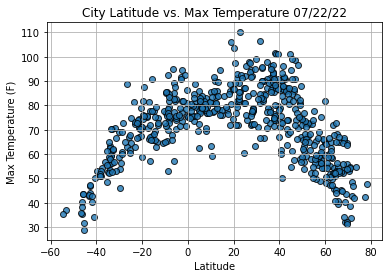

In [13]:
#Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

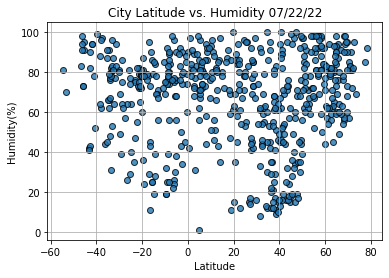

In [14]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

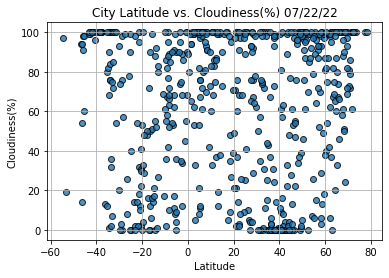

In [15]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

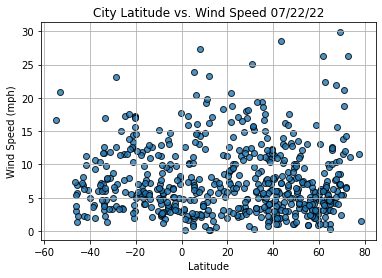

In [16]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities"
           )

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [17]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line and the equation with
#the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                       Koslan
Country                        RU
Date          2022-07-22 16:13:10
Lat                       63.4564
Lng                       48.8989
Max Temp                    71.96
Humidity                       45
Cloudiness                     67
Wind Speed                   5.75
Name: 13, dtype: object

In [19]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

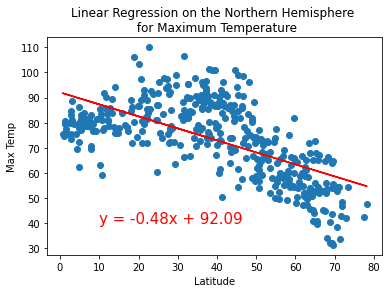

In [20]:
#Linear regression on the Maximum Temperature for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40)
                      )

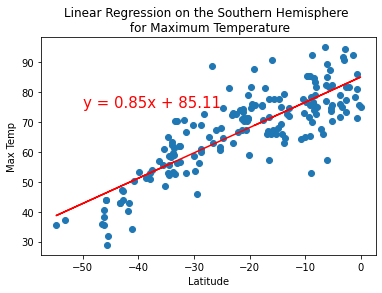

In [21]:
#Linear regression on the Maximum Temperature for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,75)
                      )

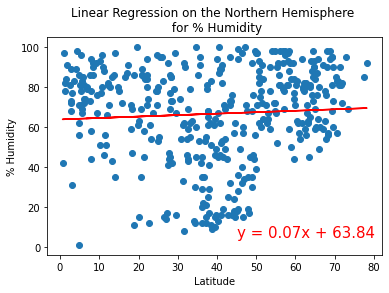

In [22]:
#Linear regression on the Humidity for the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45,5)
                      )

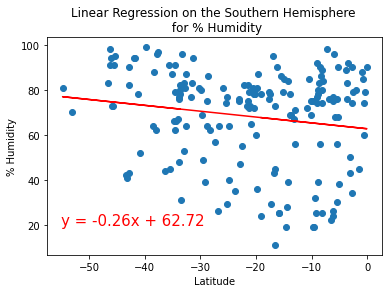

In [28]:
#Linear regression on the Humidity for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55,20)
                      )

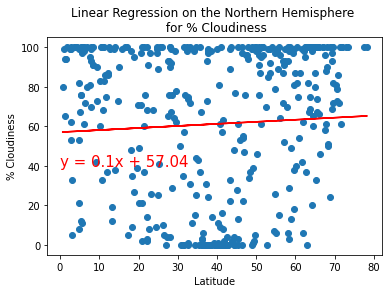

In [31]:
#Linear regression on the Cloudiness for the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (0,40)
                      )

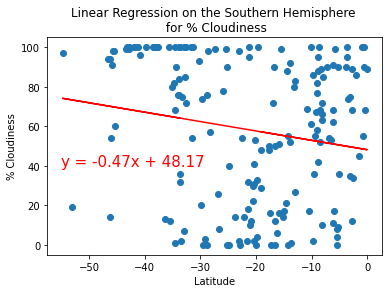

In [32]:
#Linear regression on the Cloudiness for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-55,40)
                      )

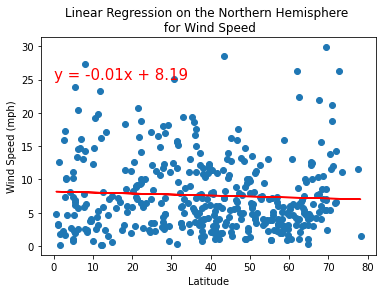

In [33]:
#Linear regression on the Wind Speed for the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (0,25)
                      )

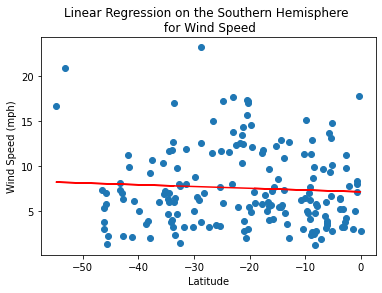

In [27]:
#Linear regression on the Wind Speed for the Southern Hemisphere 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-45,25)
                      )